In [107]:
import pandas as pd

In [108]:
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [109]:
bitcoin = bitcoin.iloc[:,[2,7]]
bitcoin.drop(range(28), inplace=True)
bitcoin.columns = ['Date', 'Close']
# bitcoin['Trend'] = bitcoin['Open']-bitcoin['Close']
# bitcoin = bitcoin[['Date', 'Trend']]
bitcoin

,Date,Close
28,20150201,228.99
29,20150202,237.83
30,20150203,228.58
31,20150204,227.11
32,20150205,216.76
...,...,...
2985,20230312,22219.08
2986,20230313,24220.00
2987,20230314,24762.65
2988,20230315,24377.16


In [110]:
# smp500['Trend'] = smp500['Open']-smp500['Close']
smp500 = smp500[['Date','Close']]
smp500 = smp500.iloc[36839:38903]
smp500.index = range(len(smp500))
smp500 

,Date,Close
0,2015-01-02,2058.20
1,2015-01-05,2020.58
2,2015-01-06,2002.61
3,2015-01-07,2025.90
4,2015-01-08,2062.14
...,...,...
2059,2023-03-09,3918.32
2060,2023-03-10,3861.59
2061,2023-03-13,3855.76
2062,2023-03-14,3919.29


<AxesSubplot: >

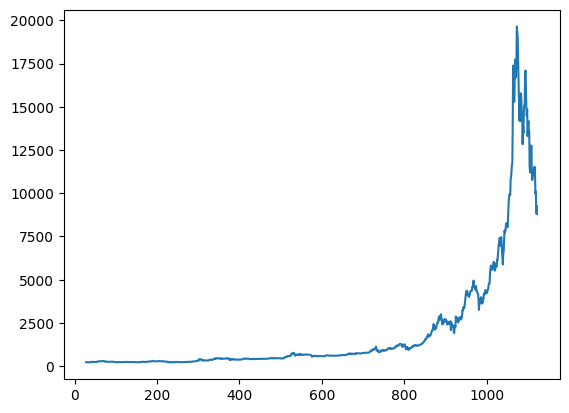

In [111]:
bitcoin.iloc[0:365*3]['Close'].plot()

<AxesSubplot: >

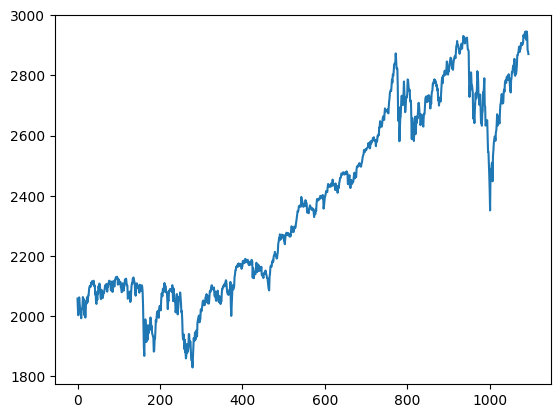

In [112]:
smp500.iloc[0:365*3]['Close'].plot()

In [113]:

smp500['Date'] =pd.to_datetime(smp500['Date'])
smp500['Date']


0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
2059   2023-03-09
2060   2023-03-10
2061   2023-03-13
2062   2023-03-14
2063   2023-03-15
Name: Date, Length: 2064, dtype: datetime64[ns]

In [114]:
smp500.index=smp500['Date']
smp500.head()

,Date,Close
Date,,
2015-01-02,2015-01-02,2058.20
2015-01-05,2015-01-05,2020.58
2015-01-06,2015-01-06,2002.61
2015-01-07,2015-01-07,2025.90
2015-01-08,2015-01-08,2062.14


In [115]:
smp500['Year']=smp500.index.year
smp500['Mon']=smp500.index.month
smp500['Day']=smp500.index.day
dates=smp500[['Year','Mon','Day']]

smp500.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
smp500

Date    Close  Year  Mon  Day
Year Mon Day                                    
2015 1   2   2015-01-02  2058.20  2015    1    2
         5   2015-01-05  2020.58  2015    1    5
         6   2015-01-06  2002.61  2015    1    6
         7   2015-01-07  2025.90  2015    1    7
         8   2015-01-08  2062.14  2015    1    8
...                 ...      ...   ...  ...  ...
2023 3   9   2023-03-09  3918.32  2023    3    9
         10  2023-03-10  3861.59  2023    3   10
         13  2023-03-13  3855.76  2023    3   13
         14  2023-03-14  3919.29  2023    3   14
         15  2023-03-15  3891.93  2023    3   15

[2064 rows x 5 columns]

In [116]:
year_day_mean=smp500.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['Close']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()


C:\Users\iksmr\AppData\Local\Temp\ipykernel_19316\844035513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=smp500.groupby(level=[0,1]).mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2015,2028.178500,2082.195789,2079.990455,2094.862857,2111.943500,2099.283636,2094.143636,2039.866190,1944.402381,2024.812727,2080.616500,2054.079545
2016,1918.597895,1904.418500,2021.954091,2075.535238,2065.550476,2083.891364,2148.902000,2177.482174,2157.690952,2143.020952,2164.985714,2246.629048
2017,2275.116000,2329.910526,2366.822174,2359.309474,2395.345909,2433.985455,2454.102500,2456.223043,2492.841000,2556.997273,2593.605714,2664.340500
2018,2789.803810,2705.155263,2702.773810,2653.625238,2701.493636,2754.352857,2793.643333,2857.820435,2901.500526,2785.464783,2723.231429,2567.307368
2019,2607.390000,2754.864211,2803.983810,2903.800000,2854.705909,2890.166000,2996.113636,2897.450455,2982.156000,2977.675217,3104.904500,3176.749524


In [117]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.994983,0.964120,0.951712,0.945395,0.932136,0.917822,0.944946,0.900846,0.878134,0.880500,0.859740
Feb,0.994983,1.000000,0.970493,0.964535,0.964331,0.955162,0.943694,0.962695,0.925738,0.908914,0.913706,0.896348
Mar,0.964120,0.970493,1.000000,0.995432,0.975171,0.946286,0.931124,0.936543,0.898307,0.872940,0.877405,0.848449
Apr,0.951712,0.964535,0.995432,1.000000,0.989043,0.967000,0.955979,0.956725,0.925280,0.905864,0.912067,0.887769
May,0.945395,0.964331,0.975171,0.989043,1.000000,0.993665,0.987640,0.985523,0.968253,0.956374,0.958975,0.936426
Jun,0.932136,0.955162,0.946286,0.967000,0.993665,1.000000,0.998540,0.995397,0.989147,0.982614,0.982920,0.964119
Jul,0.917822,0.943694,0.931124,0.955979,0.987640,0.998540,1.000000,0.994603,0.993922,0.989206,0.989382,0.973204
Aug,0.944946,0.962695,0.936543,0.956725,0.985523,0.995397,0.994603,1.000000,0.991068,0.983468,0.982726,0.967274
Sep,0.900846,0.925738,0.898307,0.925280,0.968253,0.989147,0.993922,0.991068,1.000000,0.996040,0.991434,0.977131
Oct,0.878134,0.908914,0.872940,0.905864,0.956374,0.982614,0.989206,0.983468,0.996040,1.000000,0.997893,0.988922


([<matplotlib.axis.YTick at 0x1e1208b5ea0>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

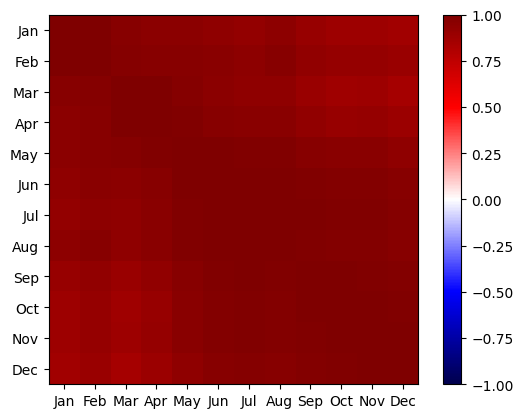

In [118]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

In [119]:
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

bitcoin.index=bitcoin['Date']
bitcoin['Year']=bitcoin.index.year
bitcoin['Mon']=bitcoin.index.month
bitcoin['Day']=bitcoin.index.day
dates=bitcoin[['Year','Mon','Day']]

bitcoin.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
bitcoin

Date     Close  Year  Mon  Day
Year Mon Day                                     
2015 2   1   2015-02-01    228.99  2015    2    1
         2   2015-02-02    237.83  2015    2    2
         3   2015-02-03    228.58  2015    2    3
         4   2015-02-04    227.11  2015    2    4
         5   2015-02-05    216.76  2015    2    5
...                 ...       ...   ...  ...  ...
2023 3   12  2023-03-12  22219.08  2023    3   12
         13  2023-03-13  24220.00  2023    3   13
         14  2023-03-14  24762.65  2023    3   14
         15  2023-03-15  24377.16  2023    3   15
         16  2023-03-16  25032.76  2023    3   16

[2962 rows x 5 columns]

C:\Users\iksmr\AppData\Local\Temp\ipykernel_19316\3648088134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=bitcoin.groupby(level=[0,1]).mean()


([<matplotlib.axis.YTick at 0x1e1209bda80>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

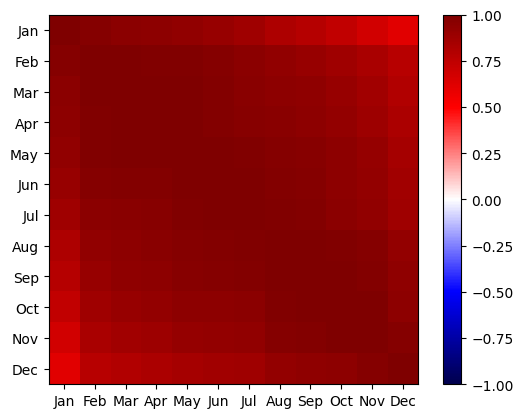

In [120]:

year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['Close']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

corr=mon_mean.corr()

import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)